<a href="https://colab.research.google.com/github/SidharthBaral/Rossmann-Retail_Sales_prediction/blob/main/Regression_Problem_Rossmann_Retail_Sales_Prediction_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# For Feature Transformation
from sklearn.metrics import mean_squared_error,r2_score


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading train,validation and test data**

In [111]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Projects/ML- datasets/Rossman_train")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Projects/ML- datasets/Rossman_test")
val_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Projects/ML- datasets/Rossman_validation")
unseen_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Projects/ML- datasets/Rossman_unseen")

In [112]:
train_data.head()

,DayOfWeek,Customers,StoreType,Assortment,CompetitionDistance,Promo2SinceWeek,Promo2SinceYear,CompetitionDurationMonths,Promo1_Participation_Week,Promo2_Participation_SinceWeek,Monthwise_Avg_Customers,Weekwise_Avg_Customers,Sales
0,5,763,0,0,21.213203,0,0,3.872983,333,0,676,842,91.257876
1,5,679,0,0,48.682646,0,0,3.872983,328,0,589,721,91.372862
2,5,798,3,2,103.923048,18,2011,3.872983,333,752,635,805,110.918889
3,5,1020,3,2,131.946959,14,2011,9.591663,333,750,795,1060,119.310519
4,5,1217,3,2,81.731267,0,0,3.872983,337,0,974,1180,105.028568


In [113]:
y_train = pd.DataFrame(train_data['Sales'])
train_data = train_data.drop(['Sales'],axis=1)

y_val = pd.DataFrame(val_data['Sales'])
val_data = val_data.drop(['Sales'],axis=1)

y_test = pd.DataFrame(test_data['Sales'])
test_data = test_data.drop(['Sales'],axis=1)

actual = pd.DataFrame(unseen_data['Sales'])
unseen_data = unseen_data.drop(['Sales'],axis=1)

In [114]:
print("Shape of unseen_data:{}and shape of target_variable:{}".format(unseen_data.shape,actual.shape))
print("Shape of train_data:{}and shape of y_train:{}".format(train_data.shape,y_train.shape))
print("Shape of val_data:{}and shape of y_val:{}".format(val_data.shape,y_val.shape))
print("Shape of test_data:{}and shape of y_test:{}".format(test_data.shape,y_test.shape))

Shape of unseen_data:(42373, 12)and shape of target_variable:(42373, 1)
Shape of train_data:(605097, 12)and shape of y_train:(605097, 1)
Shape of val_data:(75637, 12)and shape of y_val:(75637, 1)
Shape of test_data:(75637, 12)and shape of y_test:(75637, 1)


In [115]:
def rmspe(y_true, y_pred):
    # Convert DataFrame to array if y_true is a DataFrame
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values.flatten()

    assert len(y_true) == len(y_pred), "Lengths of true and predicted values must be the same."

    # Convert y_pred to array if it's not already
    y_pred = np.array(y_pred)

    # Handling division by zero
    mask = y_true != 0

    # Exclude zero values from calculations
    y_true_nonzero = y_true[mask]
    y_pred_nonzero = y_pred[mask]

    # Calculate percentage error
    percentage_error = np.divide((y_true_nonzero - y_pred_nonzero), y_true_nonzero)

    # Calculate square of percentage error
    square_percentage_error = np.square(percentage_error)

    # Calculate mean of square percentage error
    mean_square_percentage_error = np.mean(square_percentage_error)

    # Calculate RMSPE
    rmspe = np.sqrt(mean_square_percentage_error)

    return rmspe


def Model_Metrics(y_train,train_prediction,y_val,val_prediction,y_test,test_prediction):

  metrics = {}

  metrics['train_rmse'] = mean_squared_error(y_train, train_prediction, squared=False)
  metrics['train_rmspe'] = rmspe(y_train, train_prediction)
  metrics['train_r2'] = r2_score(y_train, train_prediction)

  metrics['val_rmse'] = mean_squared_error(y_val, val_prediction, squared=False)
  metrics['val_rmspe'] = rmspe(y_val, val_prediction)
  metrics['val_r2'] = r2_score(y_val, val_prediction)


  metrics['test_rmse'] = mean_squared_error(y_test, test_prediction, squared=False)
  metrics['test_rmspe'] = rmspe(y_test, test_prediction)
  metrics['test_r2'] = r2_score(y_test, test_prediction)

  return metrics

def results(metrics):
  print(f"Training Data\nR2    : {metrics['train_r2']}\nRMSE  : {metrics['train_rmse']}\nRMSPE  : {metrics['train_rmspe']}")
  print(f"\nValidation Data\nR2    : {metrics['val_r2']}\nRMSE  : {metrics['val_rmse']}\nRMSPE  : {metrics['val_rmspe']}")
  print(f"\nTesting Data\nR2    : {metrics['test_r2']}\nRMSE  : {metrics['test_rmse']}\nRMSPE  : {metrics['test_rmspe']}")


In [116]:
MSE_Score,MSE_Score_unseen_data = [],[]
RMSPE_Score,RMSPE_Score_unseen_data = [],[]
R2_Score, R2_Score_unseen_data = [],[]
Algorithm = []
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor(BaseModel)')
regressor = RandomForestRegressor()
regressor.fit(train_data, y_train)

train_prediction = regressor.predict(train_data)
val_prediction = regressor.predict(val_data)
test_prediction =  regressor.predict(test_data)

In [117]:
metrics = Model_Metrics(y_train,train_prediction,y_val,val_prediction,y_test,test_prediction)
results(metrics)
MSE_Score.append(metrics['test_rmse'])
RMSPE_Score.append(metrics['test_rmspe'])
R2_Score.append(metrics['test_r2'])

Training Data
R2    : 0.9972372290357279
RMSE  : 0.9555767034062229
RMSPE  : 0.012153825262943447

Validation Data
R2    : 0.9805089885289233
RMSE  : 2.954441849554836
RMSPE  : 0.036998303898675575

Testing Data
R2    : 0.9752252991508994
RMSE  : 3.2108831468784267
RMSPE  : 0.03847413457306988


In [118]:
def prediction_results(prediction):
  unseen_data_mse = mean_squared_error(actual, prediction, squared=False)
  unseen_data_rmspe = rmspe(actual, prediction)
  unseen_data_r2 = r2_score(actual, prediction)
  print('Model Performance in unseen_data:')
  print('MSE:',unseen_data_mse)
  print('RMSPE:',unseen_data_rmspe)
  print('R2:',unseen_data_r2)

  MSE_Score_unseen_data.append(unseen_data_mse)
  RMSPE_Score_unseen_data.append(unseen_data_rmspe)
  R2_Score_unseen_data.append(unseen_data_r2)

In [119]:
prediction =  regressor.predict(unseen_data)
prediction_results(prediction)

Model Performance in unseen_data:
MSE: 3.5763601455951086
RMSPE: 0.0422061305381672
R2: 0.9454519816233504


###**Hyper Parameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(train_data,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.3min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.7min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.7min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
Algorithm.append('RandomForestRegressor1')
regressor = RandomForestRegressor(n_estimators= 100,
 min_samples_split =2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = None,
 bootstrap =True,random_state = 42)
regressor.fit(train_data,y_train)
train_prediction = regressor.predict(train_data)
val_prediction = regressor.predict(val_data)
test_prediction =  regressor.predict(test_data)
metrics = Model_Metrics(y_train,train_prediction,y_val,val_prediction,y_test,test_prediction)
results(metrics)

MSE_Score.append(metrics['test_rmse'])
RMSPE_Score.append(metrics['test_rmspe'])
R2_Score.append(metrics['test_r2'])

Training Data
R2    : 0.9972382613176553
RMSE  : 0.9553981658558542
RMSPE  : 0.012156634560302006

Validation Data
R2    : 0.9805233103605051
RMSE  : 2.9533562005540124
RMSPE  : 0.03700832515983471

Testing Data
R2    : 0.9752622427148838
RMSE  : 3.20848824971643
RMSPE  : 0.03845892167852551


In [121]:
prediction =  regressor.predict(unseen_data)
prediction_results(prediction)

Model Performance in unseen_data:
MSE: 3.567391229951857
RMSPE: 0.04209799736168977
R2: 0.9457252332498688


**Tunning model further**

In [122]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor2')
from sklearn.metrics import mean_squared_error,r2_score
regressor = RandomForestRegressor(n_estimators= 180,
 min_samples_split=3,
 min_samples_leaf = 1,
 random_state = 45)

regressor.fit(train_data,y_train)
train_prediction = regressor.predict(train_data)
val_prediction = regressor.predict(val_data)
test_prediction =  regressor.predict(test_data)
metrics = Model_Metrics(y_train,train_prediction,y_val,val_prediction,y_test,test_prediction)

MSE_Score.append(metrics['test_rmse'])
RMSPE_Score.append(metrics['test_rmspe'])
R2_Score.append(metrics['test_r2'])

In [123]:
results(metrics)

Training Data
R2    : 0.9968515355765962
RMSE  : 1.0200994346524637
RMSPE  : 0.01296562359849832

Validation Data
R2    : 0.9806335896623058
RMSE  : 2.944983206859084
RMSPE  : 0.036848152892764115

Testing Data
R2    : 0.9753601950391684
RMSE  : 3.202129738671437
RMSPE  : 0.038356104636536895


**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

X_train  = train_data.reset_index()
# Define the number of folds for cross-validation
n_splits = 5

# Initialize the KFold cross-validation object
kf = KFold(n_splits=n_splits)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 180,
 min_samples_split=3,
 min_samples_leaf = 1,
 max_depth = 150,
 random_state = 45)

# Initialize lists to store individual scores for each sample in validation data
individual_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    # Get training and validation data for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the Random Forest Regressor on the training data for this fold
    rf_regressor.fit(X_train_fold, y_train_fold)

    # Predict on validation data for this fold
    y_pred_val_fold = rf_regressor.predict(X_val_fold)

    # Calculate R^2 score for this fold
    fold_r2_score = r2_score(y_val_fold, y_pred_val_fold)
    fold_rmse_score = mean_squared_error(y_val_fold, y_pred_val_fold, squared=False)
    metrix = {
        'r2_score': fold_r2_score,
        'rmse_score': fold_rmse_score
    }
    # Append R^2 score to the list
    individual_scores.append(metrix)

# Print individual R^2 scores for each fold
print("Individual R^2 scores for each fold:")
print(individual_scores)


Individual R^2 scores for each fold:
[{'r2_score': 0.9589275558274648, 'rmse_score': 3.142289694021465}, {'r2_score': 0.980907273414637, 'rmse_score': 2.5782578037393327}, {'r2_score': 0.9749490323658501, 'rmse_score': 3.2833600635690883}, {'r2_score': 0.9691105341678772, 'rmse_score': 2.744199176261677}, {'r2_score': 0.9774610450354282, 'rmse_score': 2.921548616241137}]


* We can see from above cross validation results that the model performance is consistent accross all subsets of train data.  

In [124]:
prediction = regressor.predict(unseen_data)
prediction_results(prediction)

Model Performance in unseen_data:
MSE: 3.5645716597875077
RMSPE: 0.042056328165293914
R2: 0.9458109939792911


In [125]:
results = actual.copy()
results['predictions'] = prediction
results = results.apply(lambda x: x ** 2)
results['Diff_in_%'] = round(((abs(results['Sales']-results['predictions'])/results['Sales'])*100),2)
results.head(10)

,Sales,predictions,Diff_in_%
0,5263.0,4740.760923,9.92
1,6064.0,5564.862359,8.23
2,8314.0,8071.844124,2.91
3,4822.0,4810.266854,0.24
4,5651.0,4806.819441,14.94
5,15344.0,13868.415861,9.62
6,8492.0,7417.580000,12.65
7,7185.0,6637.586742,7.62
8,10457.0,8635.269782,17.42
9,8959.0,8394.672975,6.30


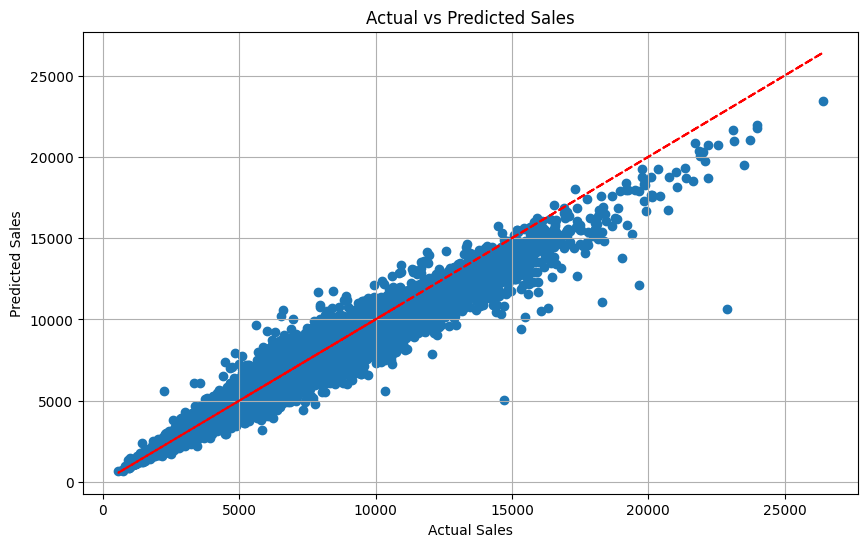

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(results['Sales'], round(results['predictions'],2))
plt.plot(results['Sales'], results['Sales'], color='r', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

* We can clearly see that the model tends to make prediction with significant errors when the sales value increases.
* This might have happen because the model would have not captured the current trend.
* Tunning the model further may not create effective changes in the model metrices.
* Inorder to create an effective improvement in the model metrices we should put more stress on feature engineering and feature extraction.

**Model performances on test data on tunning**

In [127]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, RMSPE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score','RMSPE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,RMSPE_Score,R2_Score
0,RandomForestRegressor(BaseModel),3.210883,0.038474,0.975225
1,RandomForestRegressor1,3.208488,0.038459,0.975262
2,RandomForestRegressor2,3.202130,0.038356,0.975360


**Model performances on unseen data on tunning**

In [128]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score_unseen_data,RMSPE_Score_unseen_data, R2_Score_unseen_data)),
                          columns = ['Algorithm', 'MSE_Score','RMSPE_Score','R2_Score'])
Comparison

,Algorithm,MSE_Score,RMSPE_Score,R2_Score
0,RandomForestRegressor(BaseModel),3.576360,0.042206,0.945452
1,RandomForestRegressor1,3.567391,0.042098,0.945725
2,RandomForestRegressor2,3.564572,0.042056,0.945811


In [129]:
print('Model peformance in unseen data with error<= 15%: {}%'.format(round((results[results['Diff_in_%']<=15].shape[0]/results.shape[0])*100,2)))

Model peformance in unseen data with error<= 15%: 94.0%


* We can clearly see that the model performs with 94% accuracy within error range of 15% for the given 6 weeks data.

###**Conclusion and Recomendations**

In this project we have performed sales prediction of recent six weeks data of Rossman Stores. We used Random Forest Regressor as algorithm to build model with the prediction accuracy of 94.58% in the recent six weeks data.Below are some of the important findings that we can see through overall analysis.

**Conclusion**
* More sales on Monday is seen, probably because shops generally remain closed on Sundays which had the lowest sales in a week.
* Sales and Cusatomers are highly correlated. This can be also justified through the feature importance of the model as well.
* Store type **'b'** though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level **'b'** which is only available at type b stores and being open on sundays as well.
* Most stores have competition distance within the range of 0 to 20 kms and have more sales than stores far away probably indicating competition in busy locations vs remote locations.

**Recommendations**

* More stores should be encouraged for promotion.
* Store type **'b'** should be increased in number.
* Product Category or Assortment type **'b'** should also be introduced in other Shop_types **'a' and 'c'**.